In [133]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [134]:
df = pd.read_csv('Mall_Customers.csv')

In [135]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
for i in df.columns:
    N = len(df[i])
    X = df[i]
    
    plt.hist(X,bins = N, label = i)
    plt.title(i)
    plt.show()

In [137]:
df = pd.get_dummies(df, columns=['Gender'], prefix = 'Gender', dtype = int)

In [138]:
print(df)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0                0            1  
1                0            1  
2                1            0  
3                1            0  
4            

In [139]:
# CustomerId 제거
df = df[['Gender_Female','Gender_Male','Age','Annual Income (k$)','Spending Score (1-100)']]

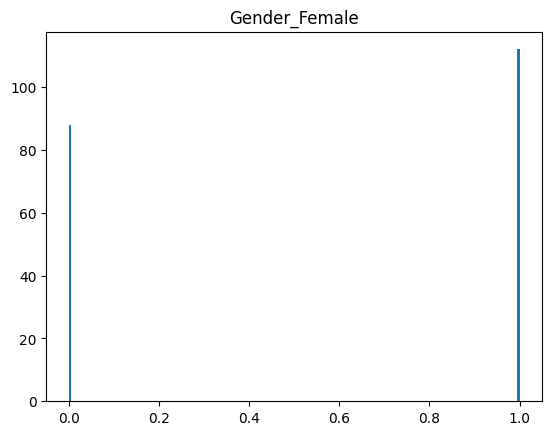

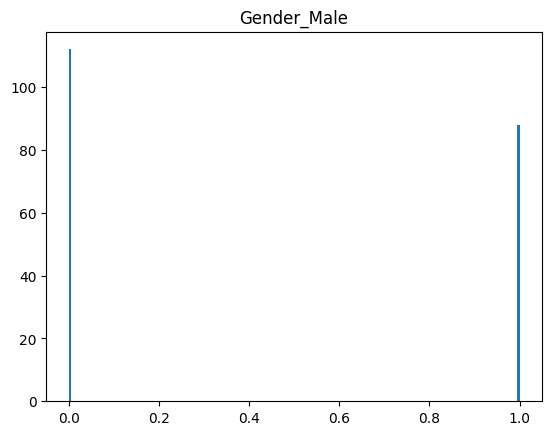

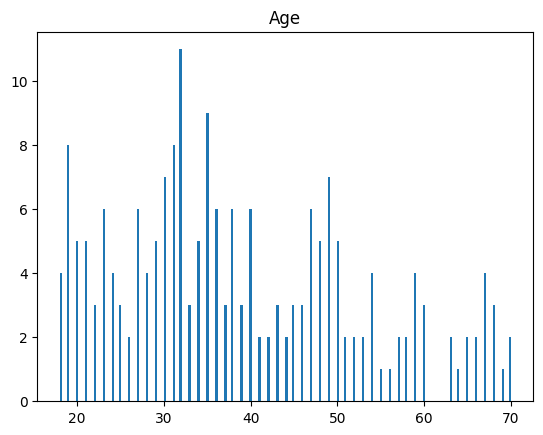

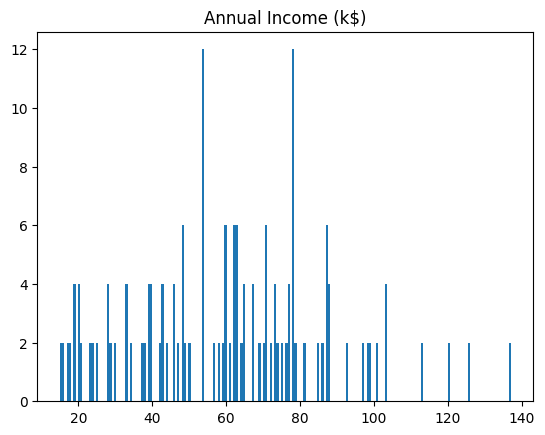

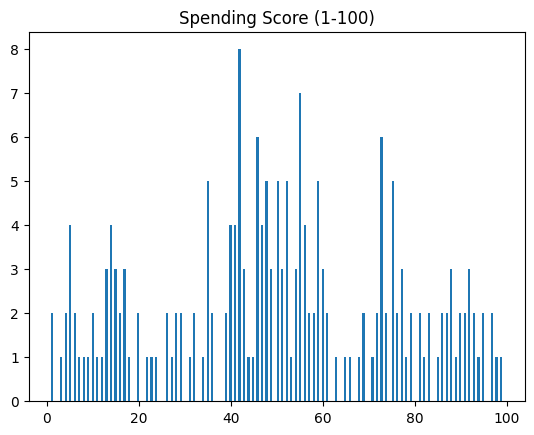

In [140]:
for i in df.columns:
    X = df[i]
    N = len(X)
    plt.hist(X, bins = N, label = i)
    plt.title(i)
    plt.show()

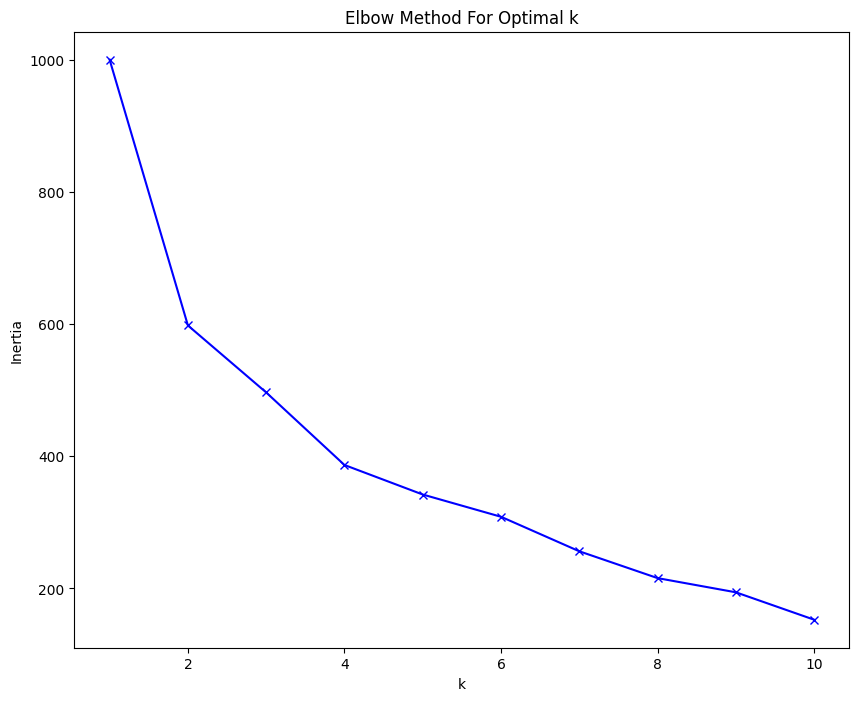

In [141]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(df_scaled)

df['cluster'] = kmeans.labels_

In [148]:
kmeans = KMeans(n_clusters =4, random_state = 42)
kmeans.fit(df_scaled)

df['cluster'] = kmeans.labels_

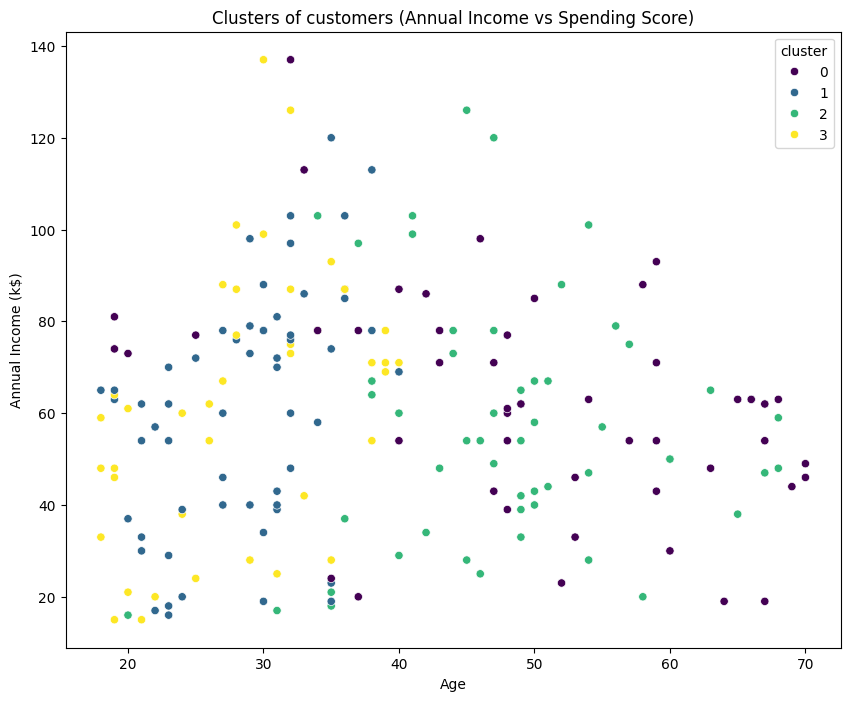

In [149]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue = df['cluster'], palette = 'viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

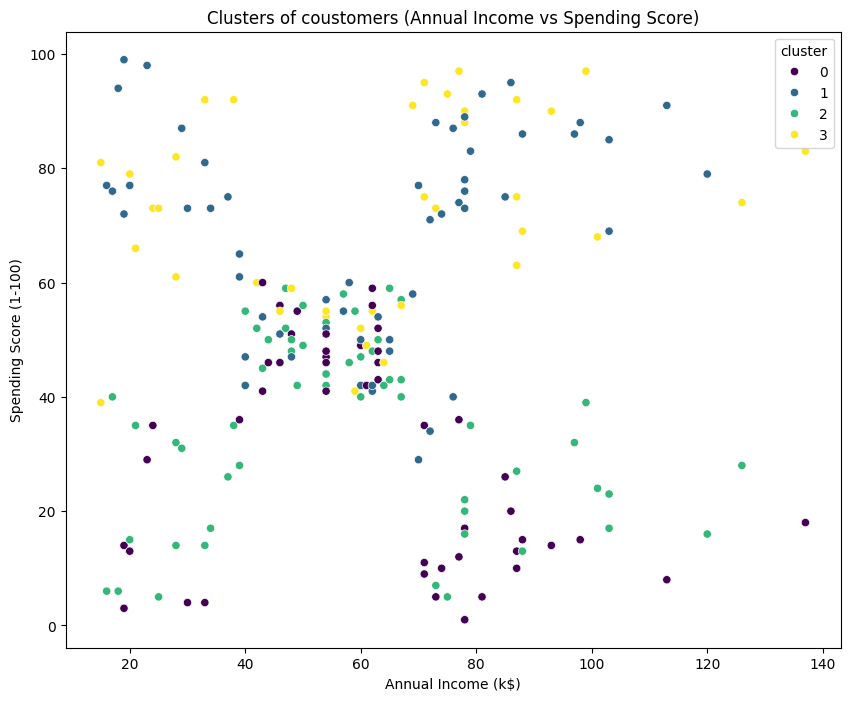

In [150]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['cluster'], palette = 'viridis')
plt.title('Clusters of coustomers (Annual Income vs Spending Score)')
plt.show()

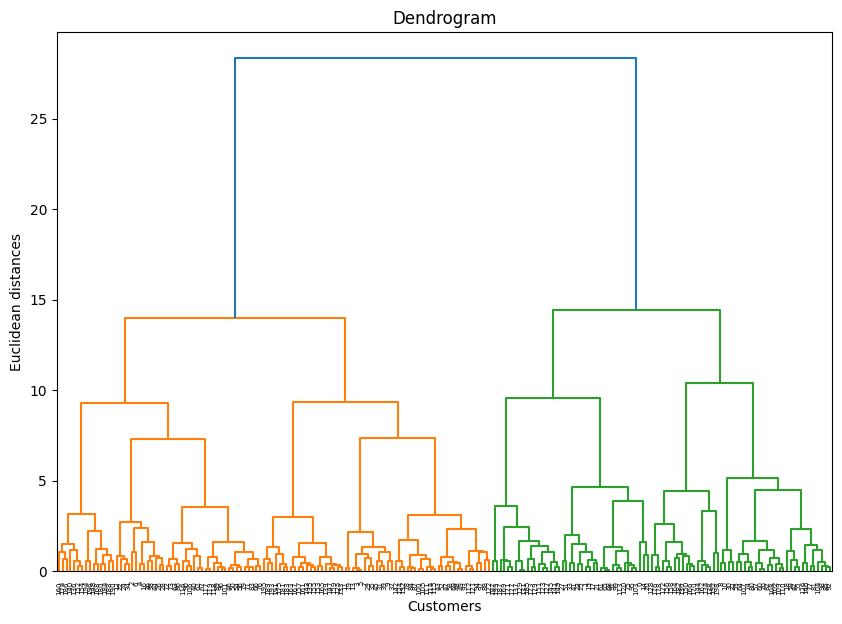

In [151]:
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

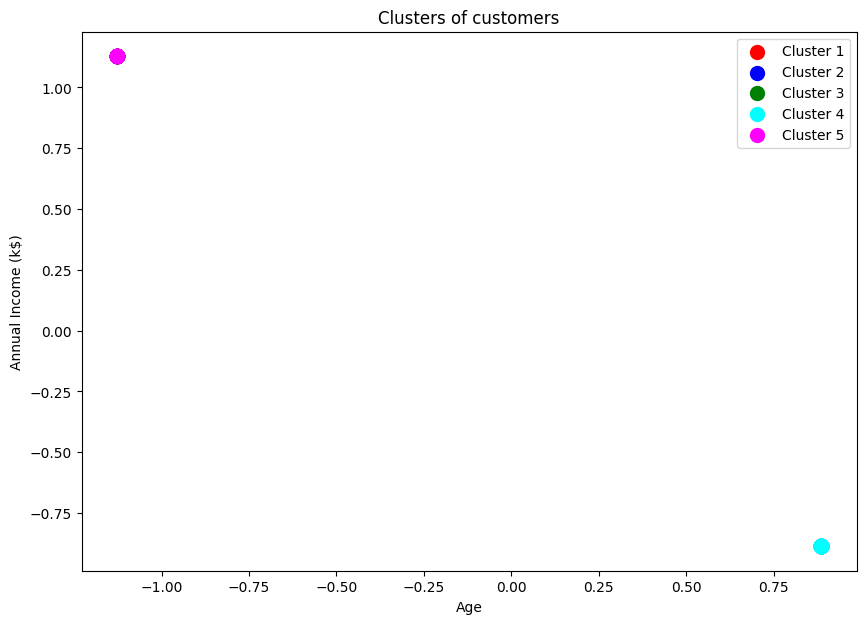

In [153]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(df_scaled)

plt.figure(figsize = (10,7))
plt.scatter(df_scaled[y_hc == 0, 0], df_scaled[y_hc == 0, 1], s = 100,c = 'red', label = 'Cluster 1' )
plt.scatter(df_scaled[y_hc == 1, 0], df_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_scaled[y_hc == 2, 0], df_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df_scaled[y_hc == 3, 0], df_scaled[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df_scaled[y_hc == 4, 0], df_scaled[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [154]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

print(f'Silhoette Score for kmeans : {silhouette_score(df_scaled, kmeans.labels_)}')

Silhouette Score: 0.3333919535475798
Silhoette Score for kmeans : 0.33220710753566407


In [159]:
from sklearn.cluster import DBSCAN

df = pd.read_csv('Mall_Customers.csv')
X= pd.get_dummies(df, columns = ['Gender'], prefix = 'Gender', dtype = int)
X = X.drop(columns = ['CustomerID'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

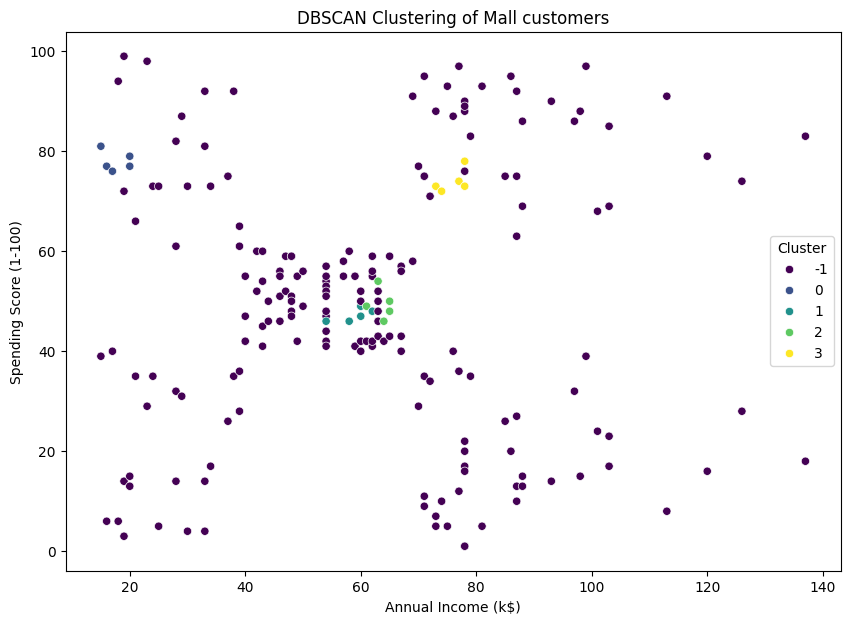

In [161]:
dbscan =DBSCAN(eps = 5, min_samples = 5)
df['Cluster'] = dbscan.fit_predict(X)

plt.figure(figsize = (10,7))
sns.scatterplot(x ='Annual Income (k$)',y = 'Spending Score (1-100)', hue = 'Cluster',  data =df, palette = 'viridis')
plt.title('DBSCAN Clustering of Mall customers')
plt.show()

In [164]:
print(silhouette_score(X_scaled,dbscan.labels_))

-0.2462908176761084
